# **Machine Learning Model**

# **Import Dataset**

In [1]:
import pandas as pd

df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


# **Data Preparation**

## **Data separation as X and y**

In [2]:
X = df.drop('Disease', axis=1)
y = df['Disease']

## **One-hot encoding**

In [3]:
X = pd.get_dummies(X, drop_first=True)

## **Data splitting**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

## **Random Forest**

### **Training the model**

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Making predictions using the model**

In [6]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

### **Evaluating the model**

In [7]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

In [8]:
print("Training Accuracy: ", train_accuracy_rf)
print("Testing Accuracy: ", test_accuracy_rf)

Training Accuracy:  0.8853046594982079
Testing Accuracy:  0.3


### **Precision**

In [9]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred_rf, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
print(f"Precision: {precision}")

Precision: 0.3107142857142857


### **F1-Score**

In [11]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

In [12]:
print(f"F1-score: {f1}")

F1-score: 0.30504201680672266


### **AUC-ROC**

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_test_pred_rf)
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted', multi_class='ovr')

In [14]:
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.6459979170829868


### **Recall**

In [15]:
from sklearn.metrics import recall_score

test_recall = recall_score(y_test, y_test_pred_rf, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
print("Recall:", test_recall)

Recall: 0.3


### **ROC-Curve**

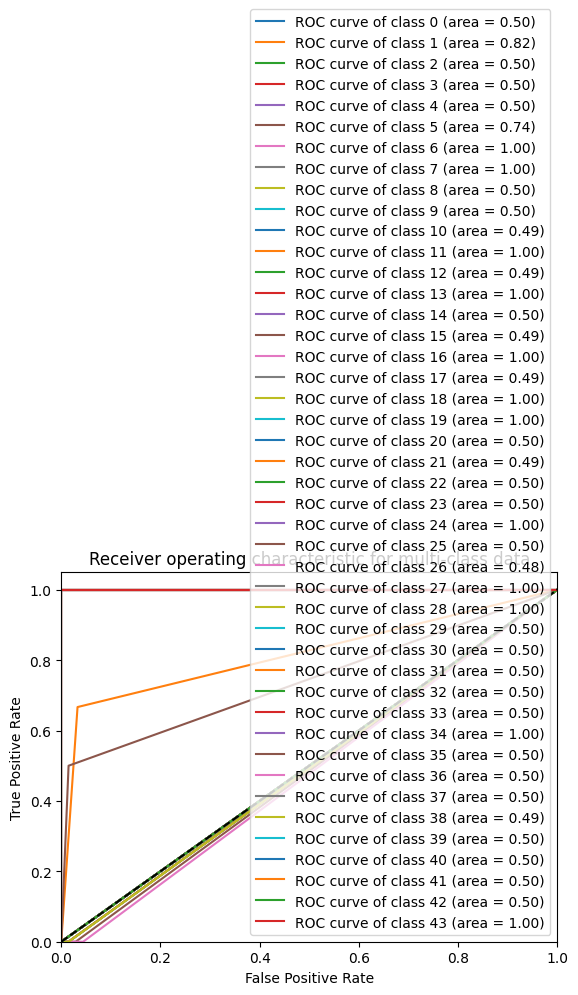

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_pred_bin = label_binarize(y_test_pred_rf, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()